# Telco Customer Churn Prediction - In Depth Analytics Project

In [1]:
import pandas as pd
df = pd.read_excel("C:/Users/gurio/Downloads/Telco Customer Churn Dataset/WA_Fn-UseC_-Telco-Customer-Churn.xlsx")

C:\Users\gurio\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Exploratory Data Analysis (EDA)

In [2]:
# 1. Inspecting the data
print(df.head())
print(df.info())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
# 2. Checking for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
# 3. Check target distribution
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [5]:
# 4. Summary stats
print(df.describe())
print(df.describe(include='object'))  # for categorical

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3          

C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


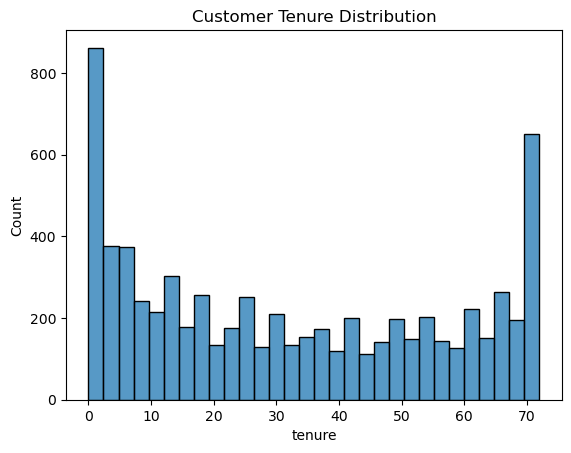

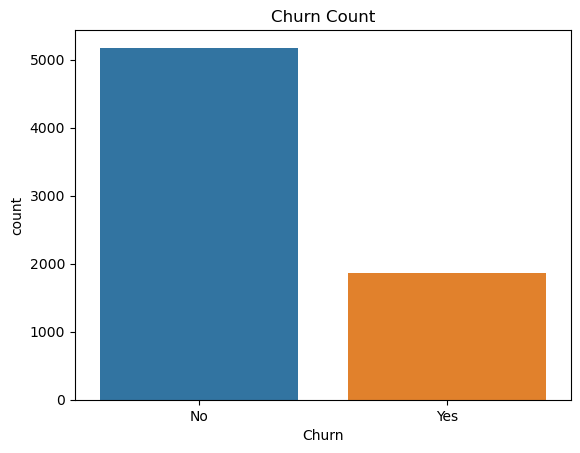

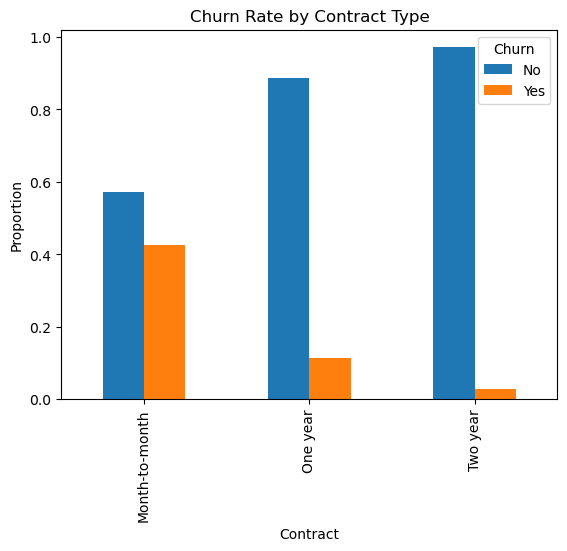

C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

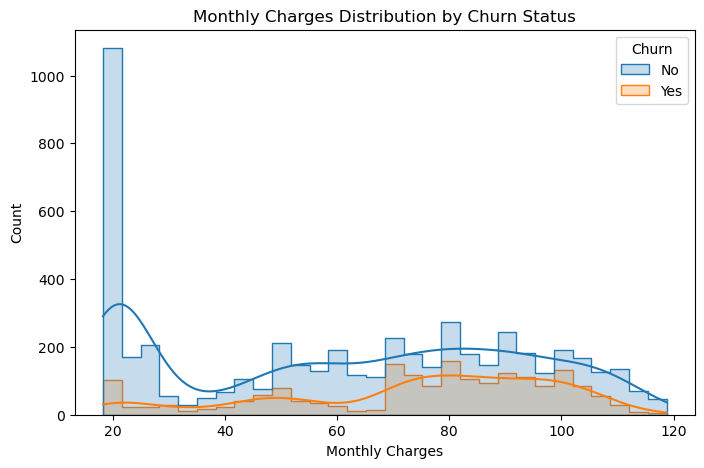

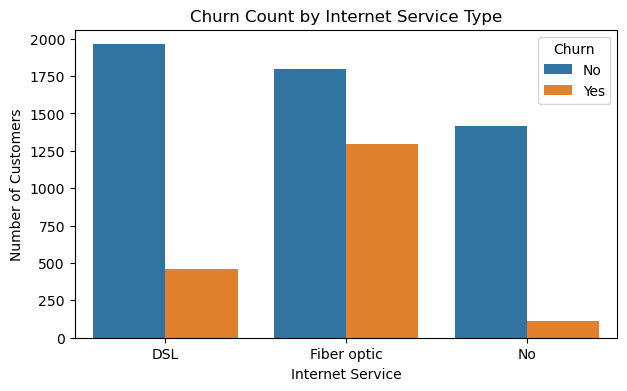

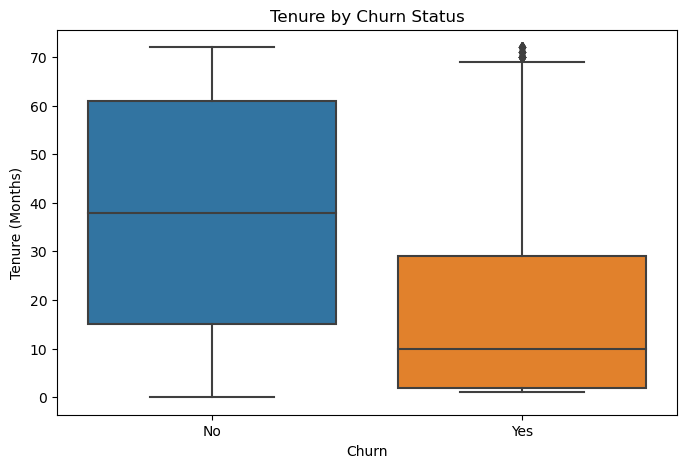

<Figure size 800x400 with 0 Axes>

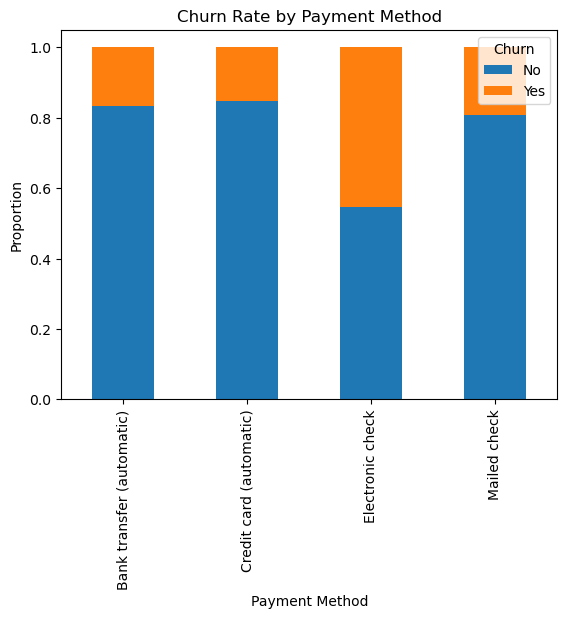

In [6]:
# 5. Basic visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of tenure
sns.histplot(df['tenure'], kde=False, bins=30)
plt.title('Customer Tenure Distribution')
plt.show()

# Churn count plot
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()

# Churn rate by Contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar') #subplots=True #stacked=True)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.show()

# Monthly charges distribution by Churn
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, element='step')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

# Churn rate by Internet Service Type
plt.figure(figsize=(7,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Count by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.show()

# Boxplot:Tenure by Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

# Churn rate across payment methods
plt.figure(figsize=(8,4))
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
payment_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Payment Method')
plt.ylabel('Proportion')
plt.xlabel('Payment Method')
plt.legend(title='Churn')
plt.show()


# Data Cleaning

## 1. Converting TotalCharges to numeric, coerce errors to NaN & Churn -> Yes = 1 & No = 0

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many values are now NaN
print(df['TotalCharges'].isnull().sum())

11


In [8]:
df.loc[df['TotalCharges'].isnull() & (df['tenure'] == 0), 'TotalCharges'] = 0
print(df['TotalCharges'].isnull().sum())

0


In [9]:
print(df.dtypes['TotalCharges'])  

# The TotalCharges feature should now be float64 data type.

float64


In [10]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


### Now, I'd like to prepare the features for machine learning. This means encoding categorical variables and ensuring all features are in a suitable format for our further ML models.

## 2. Basic Encoding for BINARY Categorical variables


In [11]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})
    
print(df[binary_cols].head())

   gender  Partner  Dependents  PhoneService  PaperlessBilling
0       0        1           0             0                 1
1       1        0           0             1                 0
2       1        0           0             1                 1
3       1        0           0             0                 0
4       0        0           0             1                 1


## 3. One-Hot Encoding for the Multi-Category Columns:

### MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod

In [12]:
multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

## 4. Feature Engineering
#### Tenure Buckets:

In [13]:
bins = [0, 12, 24, 48, 60, df['tenure'].max()]
labels = ['<12m', '12-24m', '24-48m', '48-60m', '>60m']

# Creating tenure group categorical feature
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# We now One-hot encode the tenure group, dropping the first category to avoid multicollinearity;
# so the column is now numeric and can further be used in ML
df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)

#### Average Monthly Charges

In [15]:
df['AvgMonthlyCharge'] = df.apply(
    lambda row: row['TotalCharges'] / row['tenure'] if row['tenure'] > 0 else 0,
    axis=1
)

# List all _Yes columns that indicate active subscription
active_service_cols = [
    'PhoneService',
    'MultipleLines_Yes',
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes'
]

# Make sure all those columns exist in the dataframe
for col in active_service_cols:
    if col not in df.columns:
        raise KeyError(f"Expected column '{col}' not found in DataFrame.")

# Sum active services for each customer
df['TotalServices'] = df[active_service_cols].sum(axis=1)

# Verify the result
print(df['TotalServices'].describe())
print(df[['TotalServices', 'Churn']].groupby('TotalServices').mean())

count     7043
unique       9
top          1
freq      1701
Name: TotalServices, dtype: int64
                  Churn
TotalServices          
0              0.437500
1              0.211052
2              0.328283
3              0.364767
4              0.313449
5              0.255507
6              0.224852
7              0.124051
8              0.052885


#### Total Services Subscribed


In [18]:
print(df['TotalServices'].unique())

df['TotalServices'] = pd.to_numeric(df['TotalServices'], errors='coerce')

print(df['TotalServices'].dtype)  # should now be float64 or int64

[1 3 5 4 6 2 8 7 0]
int64


In [19]:
# We drop customerID column from our data frame which will be used for ML as it is redundant feature and serves no impact for our end goal:

df = df.drop('customerID', axis=1)

## 5. Split Data into Features (X) and Target (y)


In [20]:
# Split into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

### Correlation heatmap


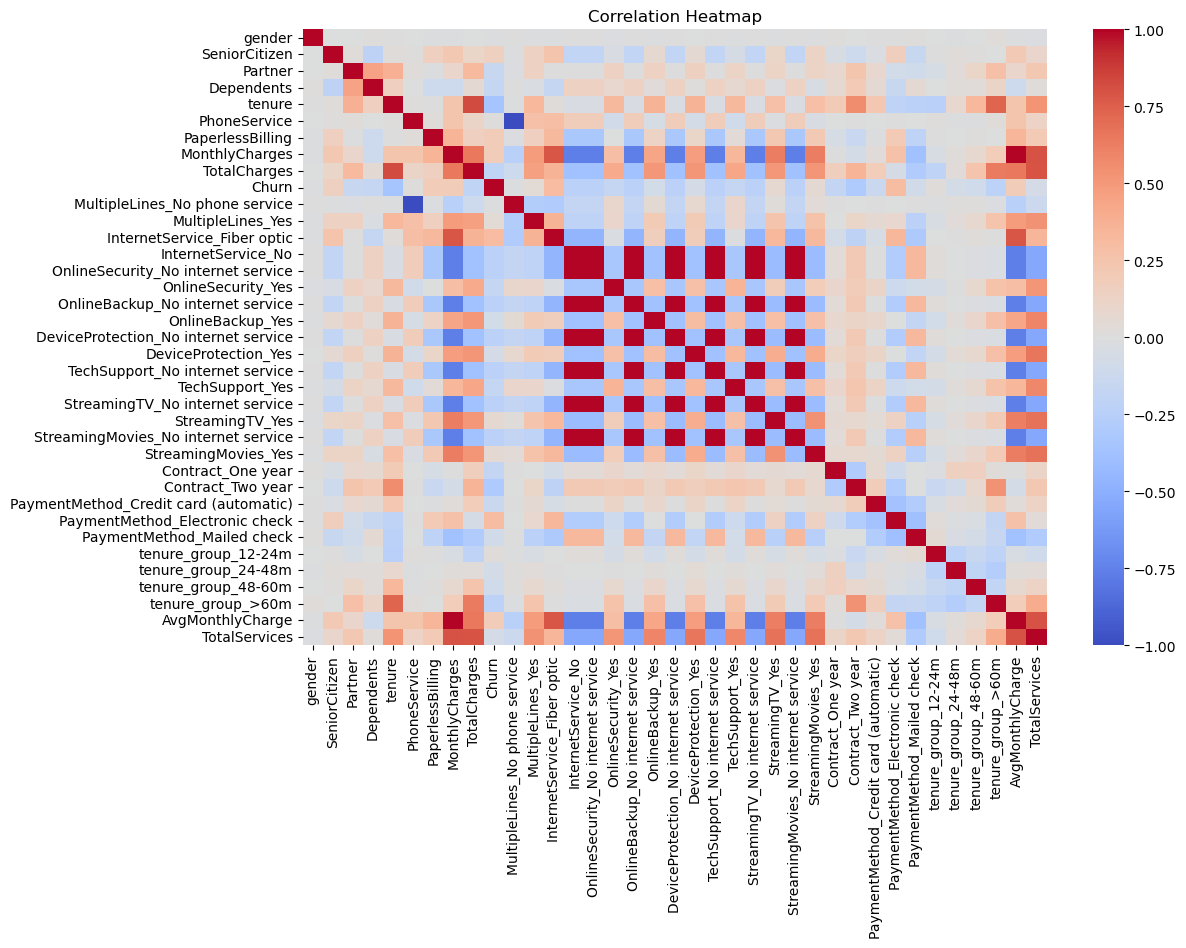

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Correlation heatmap with less-significant features dropped


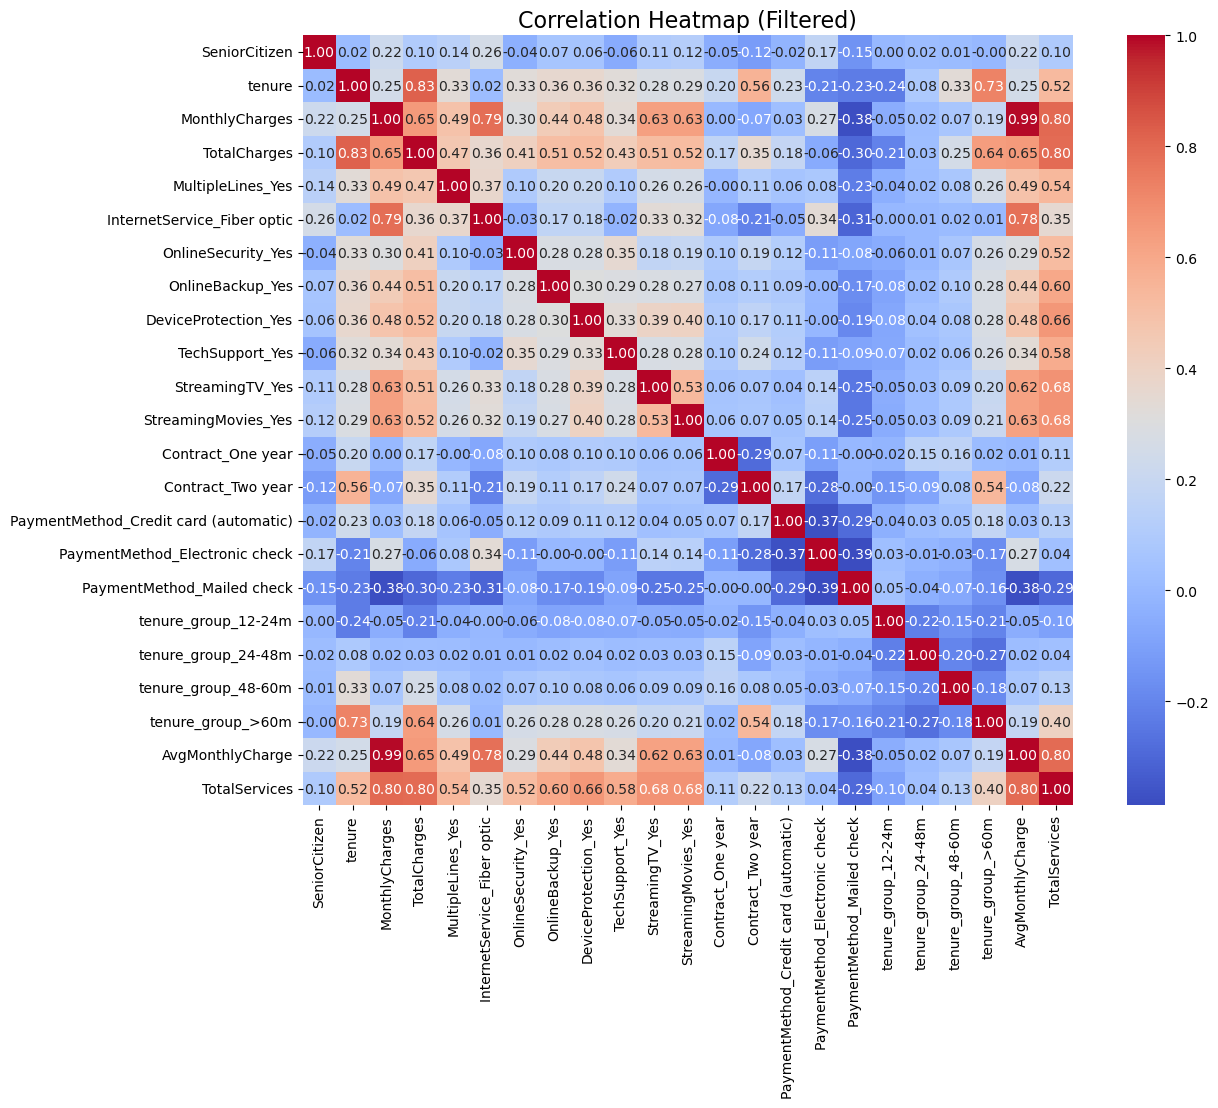

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy for correlation analysis (selecting only numeric columns you want)
corr_df = df.copy()

# Drop some unnecessary columns (example: non-numeric and certain dummy vars you don't want)
drop_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
    'MultipleLines_No phone service', 'InternetService_No',
    'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
    'DeviceProtection_No internet service', 'TechSupport_No internet service',
    'StreamingTV_No internet service', 'StreamingMovies_No internet service'
]

corr_df = corr_df.drop(columns=drop_cols, errors='ignore')

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Filtered)", fontsize=16)
plt.show()


### Kernel Density Estimate (KDE) Plots for Numeric Features Grouped by Churn:



C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



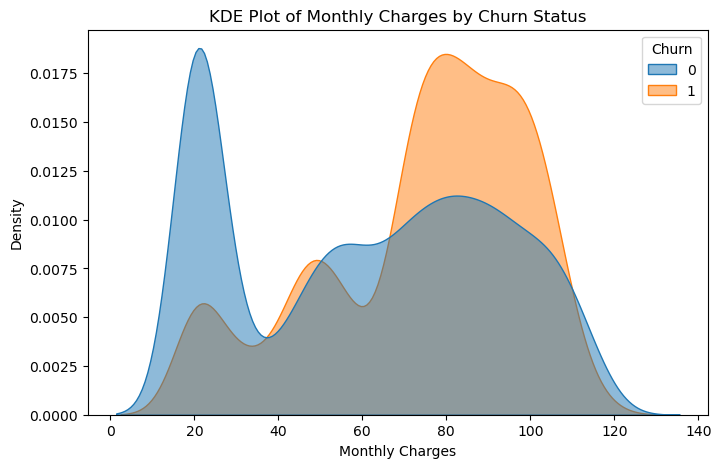

C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



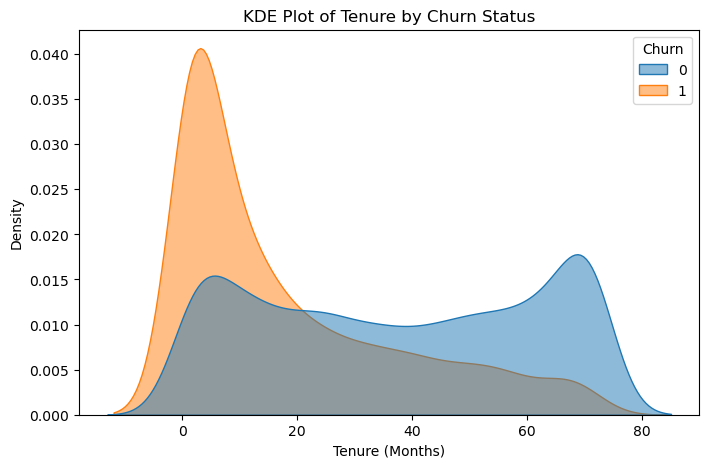

In [24]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE Plot of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE Plot of Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.show()


### Interactive KDE plots using Plotly Express:

In [23]:
import plotly.express as px

# KDE-like density plot for MonthlyCharges
fig1 = px.histogram(
    df, x="MonthlyCharges", color="Churn",
    marginal="box",  # Adds a box plot on the side
    opacity=0.6,
    nbins=50,
    histnorm="density"
)
fig1.update_layout(
    title="Distribution of Monthly Charges by Churn Status",
    xaxis_title="Monthly Charges",
    yaxis_title="Density"
)
fig1.show()

# KDE-like density plot for Tenure
fig2 = px.histogram(
    df, x="tenure", color="Churn",
    marginal="violin",  # Adds a violin plot on the side
    opacity=0.6,
    nbins=50,
    histnorm="density"
)
fig2.update_layout(
    title="Distribution of Tenure by Churn Status",
    xaxis_title="Tenure (Months)",
    yaxis_title="Density"
)
fig2.show()


C:\Users\gurio\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


C:\Users\gurio\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### 6. Train-Test Split with Stratification


In [25]:
from sklearn.model_selection import train_test_split

# Perform the stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,          # 20% for test set
    random_state=42,        # for reproducibility
    stratify=y              # Ensures class distribution is preserved
)

# Check resulting class balance:
print("Training set churn distribution:")
print(y_train.value_counts(normalize=True))
print("Test set churn distribution:")
print(y_test.value_counts(normalize=True))

Training set churn distribution:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Test set churn distribution:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


### # If we haven't already installed imbalanced-learn, please do so first:
#### !pip install --user imbalanced-learn


### Applying SMOTE (Synthetic Minority Over Sampling Technique) to the Training Data
### SMOTE is used on our TRAINING SET to balance the classes (increase the minority class: churned customers). We do not apply SMOTE to your test set.

In [26]:
from imblearn.over_sampling import SMOTE

#Create a SMOTE instance
smote = SMOTE(random_state=42)

#Fit SMOTE only on training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Confirm the new class balance
print("Resampled class distribution:")
print(y_train_res.value_counts())

Resampled class distribution:
Churn
0    4139
1    4139
Name: count, dtype: int64


In [27]:
# Check dtypes in resampled training set (should all be numeric)
print(X_train_res.dtypes)

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

## 7. Machine Learning
###  Training a baseline model (Logistic Regression)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)

# Predict on the original test data (not resampled)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[874 161]
 [145 229]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8577    0.8444    0.8510      1035
           1     0.5872    0.6123    0.5995       374

    accuracy                         0.7828      1409
   macro avg     0.7224    0.7284    0.7252      1409
weighted avg     0.7859    0.7828    0.7843      1409


ROC-AUC Score: 0.8268568033273916


C:\Users\gurio\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



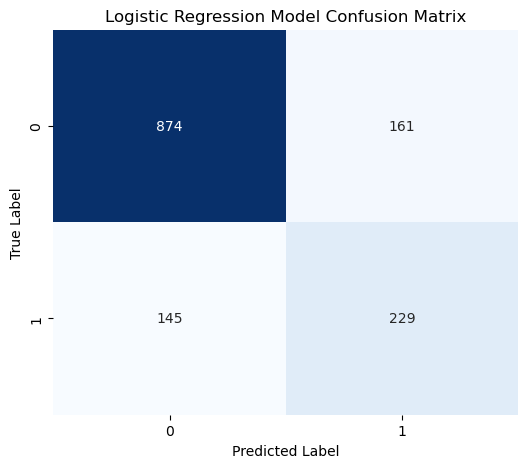

In [29]:
# Compute confusion matrix using feature-scaled log-reg model predictions
cm_basic_log_reg = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_basic_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Logistic Regression model trained on SMOTE-balanced data shows solid performance.

### Class 1 (Churn) metrics:

##### Precision: 58.7%

##### Recall: 61.2%

##### F1-score: 59.9%

### Overall model performance:

##### Accuracy: 78.3%

##### ROC-AUC: 0.827, indicating good discrimination ability.

#### The model maintains a reasonable balance between precision and recall, identifying churners moderately well with potential for further improvement.

#### Note: We see a convergence warning here, but it is not a major issue. It can be resolved by increasing the max_iter parameter or standardizing features for smoother optimization.









### FEATURE-SCALED LOGISTIC REGRESSION MODEL

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

import pandas as pd
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Initialize and train logistic regression model
lr = LogisticRegression(max_iter=5000, random_state=42)  # increase from 1000 to 5000 or more
lr.fit(X_train_res_scaled, y_train_res)

# Predict on the original test data (not resampled)
y_pred_fs = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("LR Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_fs))

print("\n LR Classification Report:")
print(classification_report(y_test, y_pred_fs, digits=4))

print("\n LR ROC-AUC Score:", roc_auc_score(y_test, y_proba))

LR Confusion Matrix:
[[879 156]
 [145 229]]

 LR Classification Report:
              precision    recall  f1-score   support

           0     0.8584    0.8493    0.8538      1035
           1     0.5948    0.6123    0.6034       374

    accuracy                         0.7864      1409
   macro avg     0.7266    0.7308    0.7286      1409
weighted avg     0.7884    0.7864    0.7874      1409


 LR ROC-AUC Score: 0.8366658916531039


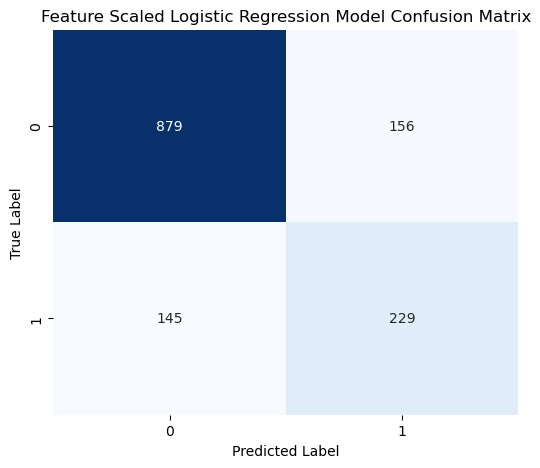

In [31]:
# Compute confusion matrix using feature-scaled log-reg model predictions
cm_scaled_log_reg = confusion_matrix(y_test, y_pred_fs)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_scaled_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Feature Scaled Logistic Regression Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Logistic regression model with feature scaling shows a noticeable improvement:

##### Accuracy improved slightly to 78.6%

##### Precision for the minority churn class increased from ~58.7% to ~59.5%

#### Recall remained the same at about 61.2%

#### F1-score for churn improved marginally from 59.9% to 60.3%

#### ROC-AUC improved from ~0.827 to ~0.837, indicating better overall discrimination

### What this means:
##### Scaling features helped the model converge better and find a slightly improved decision boundary.

##### The model’s ability to identify churners (recall) remains steady, but precision and ROC-AUC gains show better confidence in predictions.

##### The confusion matrix confirms a slightly better balance in false positives and true negatives.

### Next steps to continue improving:
##### Trying stronger models: I would like to try Random Forests, XGBoost, or LightGBM which often deliver better predictive power for churn problems.

### Hyperparameter tuning:
##### Use GridSearchCV or RandomizedSearchCV to tune your model’s hyperparameters for optimal performance.

### Model explainability:
##### Apply SHAP or LIME to interpret feature importances and provide actionable business insights.

### Threshold tuning:
##### Adjust the classification threshold to optimize recall or precision based on business priorities

### Training a RANDOM FOREST MODEL ON SMOTE-balaned DATASET

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Scale your training and test features
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)  # X_train_res is your SMOTE-resampled train set
X_test_scaled = scaler.transform(X_test)                # Scale test set using the same scaler

# 2. Train Random Forest on scaled training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res_scaled, y_train_res)

# 3. Predict and evaluate on scaled test data
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, digits=4))

print("\nRandom Forest ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Random Forest Confusion Matrix:
[[866 169]
 [157 217]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0     0.8465    0.8367    0.8416      1035
           1     0.5622    0.5802    0.5711       374

    accuracy                         0.7686      1409
   macro avg     0.7044    0.7085    0.7063      1409
weighted avg     0.7711    0.7686    0.7698      1409


Random Forest ROC-AUC Score: 0.8165581647678835


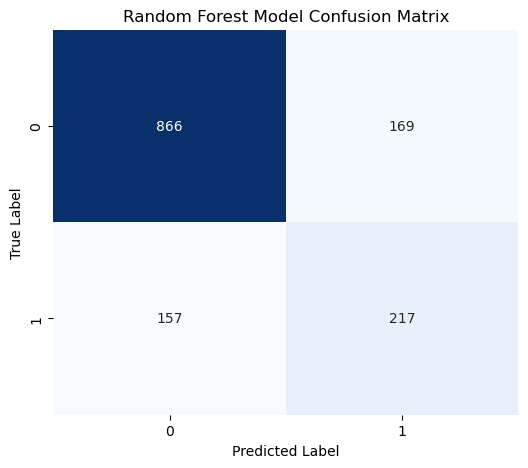

In [33]:
# Compute confusion matrix using random forest model predictions
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Hyperparameter Tuning
##### Using GridSearchCV or RandomizedSearchCV to tune model parameters to improve performance. For Random Forest, parameters like n_estimators, max_depth, min_samples_split can be tuned.

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Scale your SMOTE-resampled training data and test data
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# 2. Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 3. Instantiate the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# 4. Set up RandomizedSearchCV with cross-validation and scoring metric
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,             # number of parameter settings that are sampled
    cv=3,                  # 3-fold cross-validation
    scoring='roc_auc',     # metric to optimize
    random_state=42,
    n_jobs=-1,             # use all cores
    verbose=2
)

# 5. Fit randomized search on training data
rand_search.fit(X_train_res_scaled, y_train_res)

# 6. Get best model and parameters
best_rf = rand_search.best_estimator_
print("Best parameters found:", rand_search.best_params_)

# 7. Make predictions on the scaled test set
y_pred_best_rf = best_rf.predict(X_test_scaled)
y_proba_best_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# 8. Evaluate the tuned model performance
print("Tuned RF Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

print("\nTuned RF Classification Report:")
print(classification_report(y_test, y_pred_best_rf, digits=4))

print("\nTuned RF ROC-AUC Score:", roc_auc_score(y_test, y_proba_best_rf))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40, 'bootstrap': False}
Tuned RFConfusion Matrix:
[[855 180]
 [148 226]]

Tuned RF Classification Report:
              precision    recall  f1-score   support

           0     0.8524    0.8261    0.8391      1035
           1     0.5567    0.6043    0.5795       374

    accuracy                         0.7672      1409
   macro avg     0.7045    0.7152    0.7093      1409
weighted avg     0.7739    0.7672    0.7702      1409


Tuned RF ROC-AUC Score: 0.82296623524245


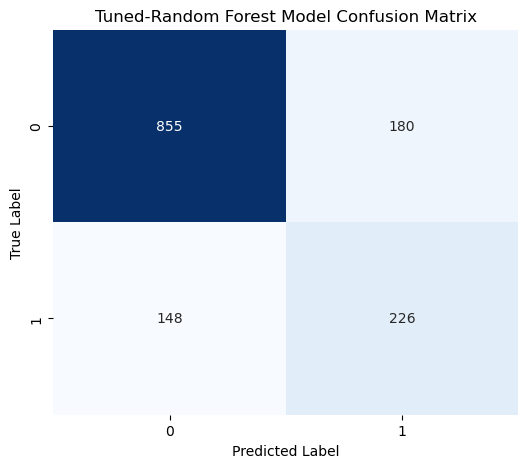

In [35]:
# Confusion matrix using random forest tuned parameters model predictions
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Tuned-Random Forest Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Let's start with SHAP explainability for our Random Forest model. SHAP (SHapley Additive exPlanations) helps interpret the contribution of each feature to predictions, both globally (across all samples) and locally (for individual predictions). This gives us a clear insight into what drives customer churn according to our model.


In [39]:
#%matplotlib inline
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert scaled X_test back to DataFrame for SHAP plotting
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Create a SHAP TreeExplainer for Random Forest
explainer = shap.TreeExplainer(best_rf)

# Take a sample for faster computation
sample_size = 1000
if len(X_test_df) > sample_size:
    X_test_sample = X_test_df.sample(n=sample_size, random_state=42)
else:
    X_test_sample = X_test_df.copy()


In [40]:
# Compute SHAP values using new API (returns Explanation object)
shap_values_exp = explainer(X_test_sample)

# Inspect the shape
print("SHAP values shape:", shap_values_exp.values.shape)  # (samples, features, classes)

SHAP values shape: (1000, 36, 2)


##### Using these SHAP values for plotting (class 1, i.e., "churn")

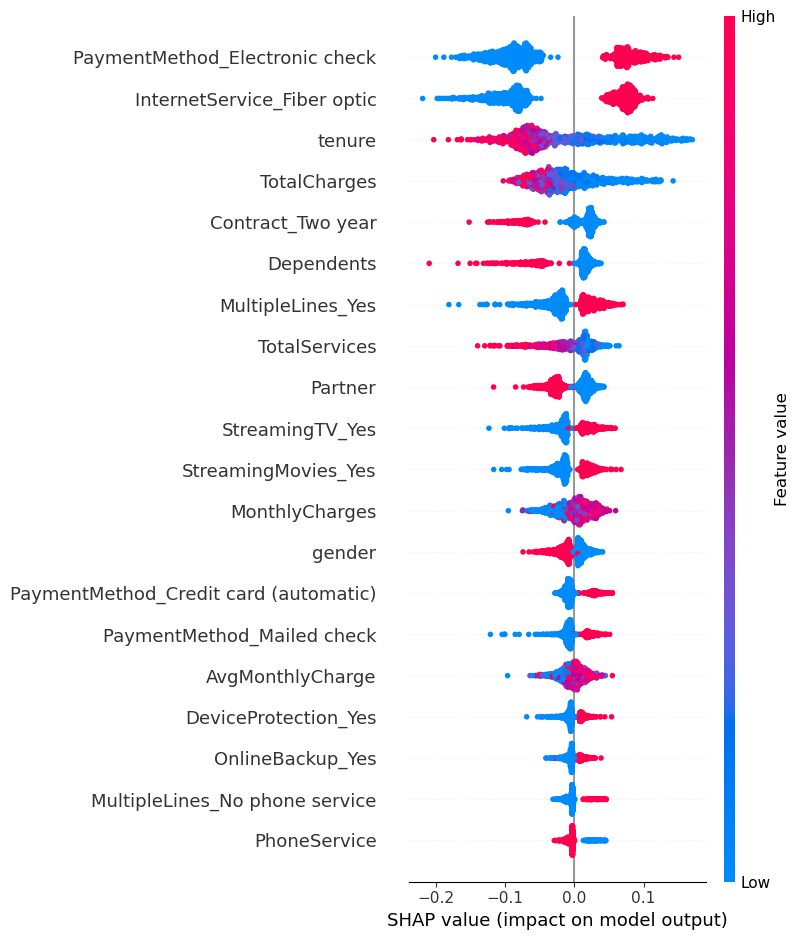

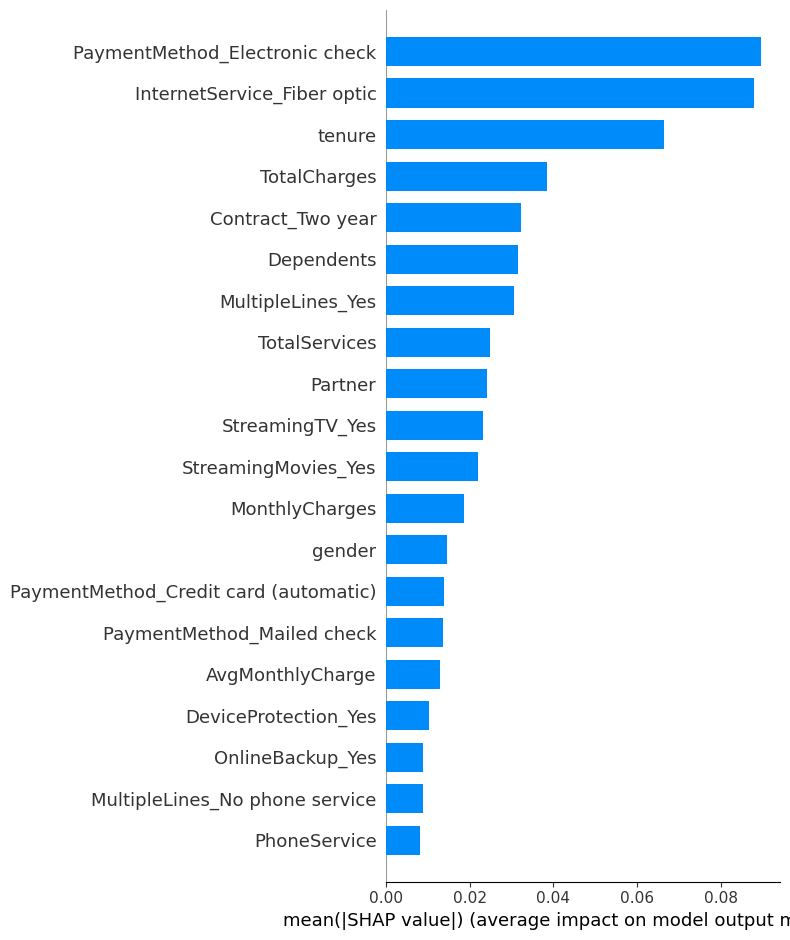

In [41]:
# Plot global SHAP summary for the positive (churn) class = 1
## Explains direction & distribution of feature impact for individual customers
shap.summary_plot(shap_values_exp.values[:, :, 1], X_test_sample, plot_type="dot", show=True)

# You can also try the bar version for average global importance:
## Explains global average importance of each feature
shap.summary_plot(shap_values_exp.values[:, :, 1], X_test_sample, plot_type="bar", show=True)


### Executive Summary:
##### - The SHAP summary plot shows that the most influential factors driving churn are customers using electronic checks, those with fiber optic internet, and shorter tenure or month-to-month contracts.

##### - Conversely, customers with two-year contracts, higher total charges, and longer tenure are less likely to churn.

##### - This aligns with business logic: Loyal, long-term, contract-bound customers are more stable, while high-cost, month-to-month, electronic-check customers are at risk of leaving.


### Key Business Actions to Derive

##### 1. Target fiber optic + electronic check users with retention campaigns.

##### 2. Offer discounts or incentives for these users to move to automatic or credit card payment.

##### 3. Encourage longer contract commitments among high-risk customers.

##### 4. Reward long-tenure users to reinforce loyalty.

### Table showing each feature’s mean absolute SHAP value

In [42]:
import pandas as pd
import numpy as np

# Compute mean absolute SHAP value per feature for class 1 (e.g., churn)
mean_abs_shap = np.abs(shap_values_exp.values[:, :, 1]).mean(axis=0)

# Create DataFrame for clarity
shap_summary_df = pd.DataFrame({
    'Feature': X_test_sample.columns,
    'MeanAbsSHAP': mean_abs_shap
}).sort_values(by='MeanAbsSHAP', ascending=False).reset_index(drop=True)

# Display top features
print(shap_summary_df.head(10))


                          Feature  MeanAbsSHAP
0  PaymentMethod_Electronic check     0.089678
1     InternetService_Fiber optic     0.087992
2                          tenure     0.066316
3                    TotalCharges     0.038509
4               Contract_Two year     0.032217
5                      Dependents     0.031426
6               MultipleLines_Yes     0.030664
7                   TotalServices     0.024713
8                         Partner     0.023992
9                 StreamingTV_Yes     0.023093


### The SHAP feature importance analysis reveals that: 


##### Payment method and internet service type are the most influential drivers of churn in this model.

##### Specifically, customers who pay by electronic check or use fiber optic internet contribute most strongly to churn predictions.

##### Features such as tenure, total charges, and contract type serve as stabilizing factors, meaning longer relationships and multi-year contracts are associated with lower churn risk.

##### Demographic and service bundle factors like dependents, partner status, and multiple services play secondary but consistent roles in reducing churn likelihood.

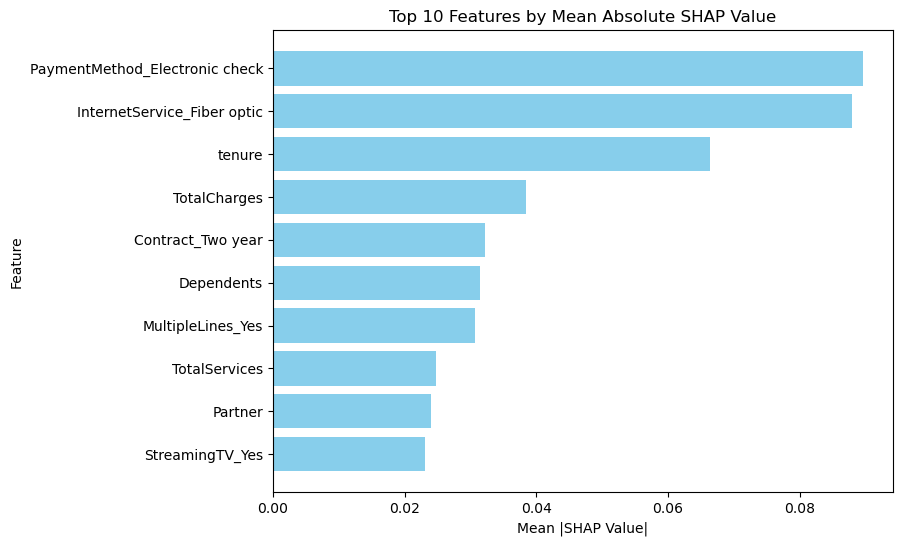

In [43]:
plt.figure(figsize=(8,6))
plt.barh(shap_summary_df['Feature'][:10], shap_summary_df['MeanAbsSHAP'][:10], color='skyblue')
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Feature")
plt.title("Top 10 Features by Mean Absolute SHAP Value")
plt.gca().invert_yaxis()
plt.show()


## XGBoost model 
#### Training and evaluating an XGBoost classifier on my SMOTE-balanced, scaled dataset:

In [44]:
#!pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# 1. Instantiate XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# 2. Train baseline model on resampled, scaled training data
xgb_clf.fit(X_train_res_scaled, y_train_res)

# 3. Predict on scaled test data
y_pred_xgb = xgb_clf.predict(X_test_scaled)
y_proba_xgb = xgb_clf.predict_proba(X_test_scaled)[:, 1]



C:\Users\gurio\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[23:44:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




### Evaluate baseline model


In [45]:
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, digits=4))

print("\nXGBoost ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))


XGBoost Confusion Matrix:
[[868 167]
 [167 207]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0     0.8386    0.8386    0.8386      1035
           1     0.5535    0.5535    0.5535       374

    accuracy                         0.7630      1409
   macro avg     0.6961    0.6961    0.6961      1409
weighted avg     0.7630    0.7630    0.7630      1409


XGBoost ROC-AUC Score: 0.8094254566121574


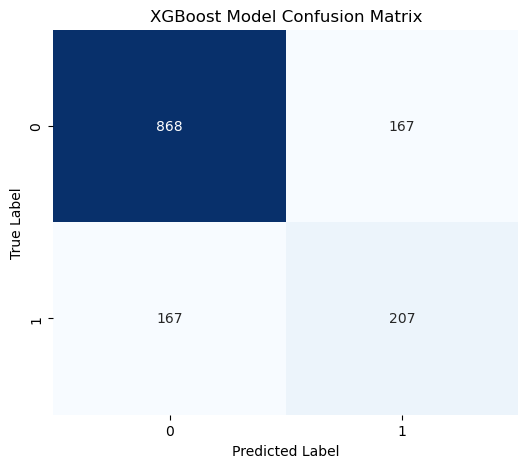

In [51]:
# Compute confusion matrix using XGBoost model predictions
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Hyperparameter tuning


In [52]:


param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.5, 2],
}

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train_res_scaled, y_train_res)

best_xgb = random_search.best_estimator_
print("Best XGBoost Parameters:", random_search.best_params_)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best XGBoost Parameters: {'subsample': 0.8, 'reg_lambda': 2, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


C:\Users\gurio\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[23:45:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




### Evaluate the tuned model


In [53]:
y_pred_best_xgb = best_xgb.predict(X_test_scaled)
y_proba_best_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]

print("Tuned XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_xgb))

print("\nTuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_best_xgb, digits=4))

print("\nTuned XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_proba_best_xgb))

Tuned XGBoost Confusion Matrix:
[[874 161]
 [163 211]]

Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0     0.8428    0.8444    0.8436      1035
           1     0.5672    0.5642    0.5657       374

    accuracy                         0.7700      1409
   macro avg     0.7050    0.7043    0.7047      1409
weighted avg     0.7697    0.7700    0.7699      1409


Tuned XGBoost ROC-AUC Score: 0.8158141517476555


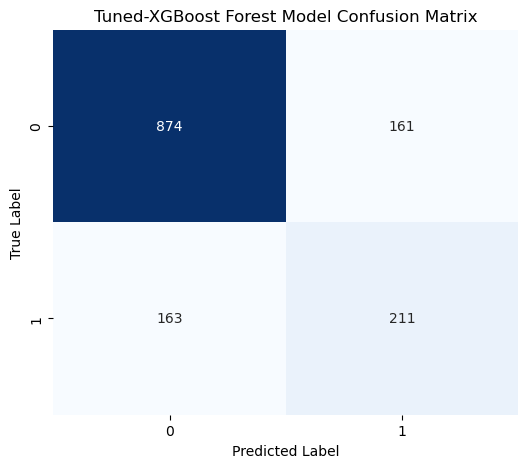

In [54]:
# Compute confusion matrix using XGBoost model predictions
cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Tuned-XGBoost Forest Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### SHAP explainer for XGBoost

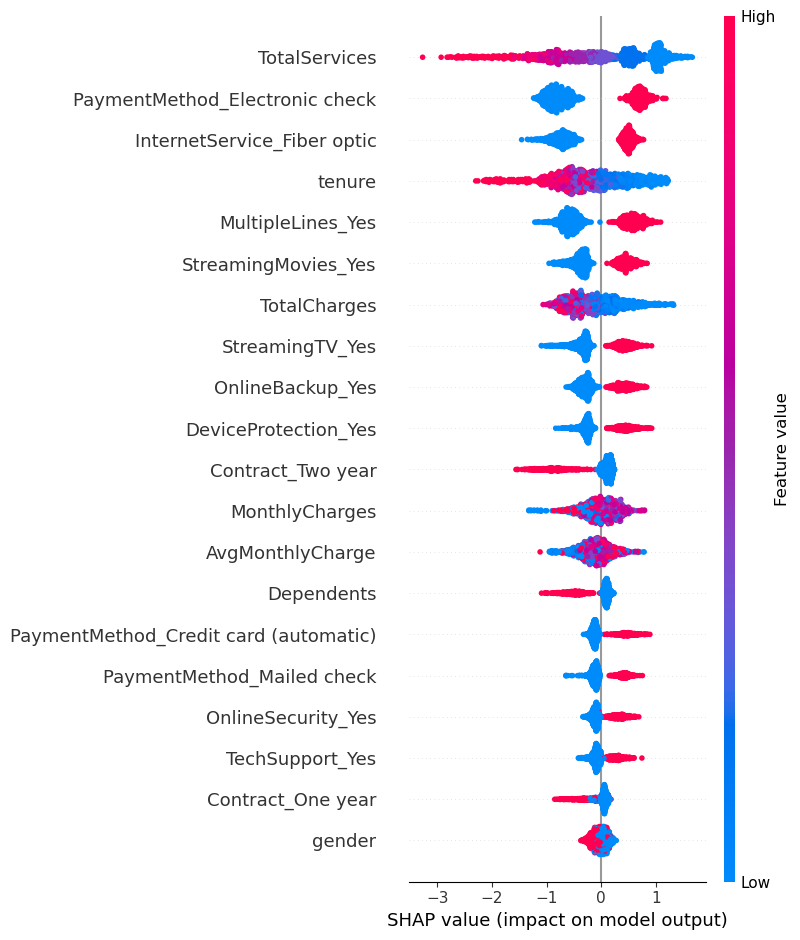

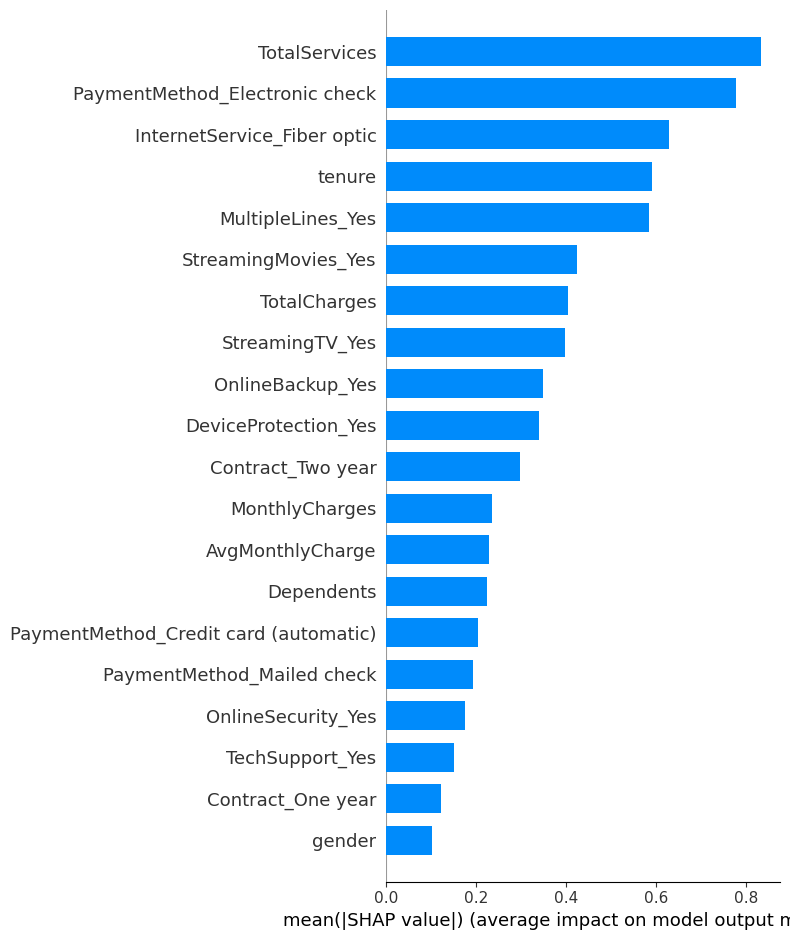

In [55]:
# Initialize the SHAP TreeExplainer with the best XGBoost model
explainer = shap.TreeExplainer(best_xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled_df)

# Plot the SHAP summary plot (dot plot)
shap.summary_plot(shap_values, X_test_scaled_df)

# Plot the SHAP bar plot (feature importance)
shap.summary_plot(shap_values, X_test_scaled_df, plot_type='bar')


### I'd like to build an ensemble model for my churn prediction task, combining my best models from Logistic Regression, tuned Random Forest, and tuned XGBoost. I'd like to see if this can improve predictive performance by leveraging their individual strengths.

##### Voting Classifier: Soft Voting

In [56]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming you have:
# - scaled SMOTE training data: X_train_res_scaled, y_train_res
# - scaled test data: X_test_scaled
# - trained models: lr (logistic regression), best_rf (tuned Random Forest), best_xgb (tuned XGBoost)

# Create a VotingClassifier ensemble
ensemble = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft'  # use 'soft' to average predicted probabilities (better performance usually)
)

# Train ensemble on training data
ensemble.fit(X_train_res_scaled, y_train_res)

# Predict on the test set
y_pred_ensemble = ensemble.predict(X_test_scaled)
y_proba_ensemble = ensemble.predict_proba(X_test_scaled)[:, 1]

# Evaluate ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Ensemble Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))

print("\nEnsemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble, digits=4))

print("\nEnsemble ROC-AUC Score:", roc_auc_score(y_test, y_proba_ensemble))


C:\Users\gurio\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[23:47:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Ensemble Confusion Matrix:
[[880 155]
 [153 221]]

Ensemble Classification Report:
              precision    recall  f1-score   support

           0     0.8519    0.8502    0.8511      1035
           1     0.5878    0.5909    0.5893       374

    accuracy                         0.7814      1409
   macro avg     0.7198    0.7206    0.7202      1409
weighted avg     0.7818    0.7814    0.7816      1409


Ensemble ROC-AUC Score: 0.8336252551086312


### Ensemble Model Performance Summary
##### Accuracy: 78.1%
##### Model correctly classified about 78% of all customers (both those who churn and those who don’t). This is a good overall performance considering class imbalance.

#### Precision for Churn (class 1): 58.8%
##### Out of all customers our model predicted as churners, about 58.8% truly churned. So, when the model flags a customer as likely to churn, it is correct roughly 6 out of 10 times.

#### Recall for Churn: 59.1%
##### The model captures about 59.1% of the actual churners. This means it detects more than half of all churn events, which is useful for proactive retention efforts.

#### F1-Score for Churn: 58.9%
##### The harmonic mean of precision and recall balances the trade-off between false positives and false negatives.

#### ROC-AUC Score: 0.834
##### This is a strong score indicating the model has a good ability to differentiate between churners and non-churners across all classification thresholds.

#### Business Implication of These Metrics
###### Balanced performance: Your ensemble improves over initial individual models, especially in ROC-AUC, implying better overall classification quality.

#### Moderate precision and recall:
##### There is a balance between catching actual churners and not falsely alarming too many loyal customers. Depending on your retention campaign costs, you may want to lean towards improving recall (catching more churners) or precision (reducing false alarms).

#### False positives and false negatives:
##### False positives (customers incorrectly predicted as churners): 155 — These customers may receive retention offers unnecessarily.

##### False negatives (actual churners missed by model): 153 — These are risky as these churners won’t be contacted, resulting in lost revenue.

## Possible Next Steps for Interpretation and Improvement

### Threshold tuning:
##### Adjust classification threshold to optimize precision or recall depending on business costs. For example, decreasing the threshold may increase recall but reduce precision.

### Feature importance analysis:
##### Use SHAP or built-in feature importance to understand key drivers influencing the ensemble’s predictions and aid business insights.

### Segment analysis:
##### Analyze which customer groups the model performs best or worst on (e.g., tenure, geography) for targeted strategies.

# VISUALIZATIONS

## CONFUSION MATRIX HEATMAP

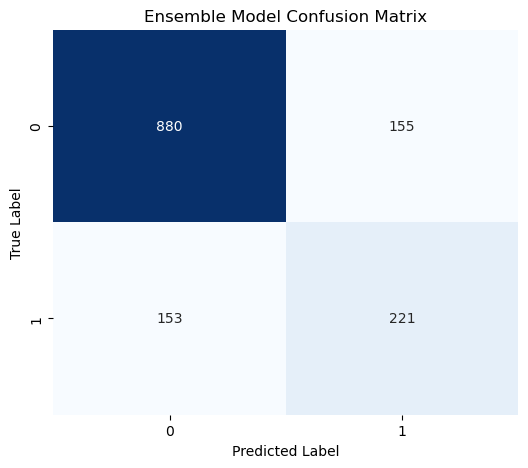

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix using ensemble model predictions
cm = confusion_matrix(y_test, y_pred_ensemble)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ensemble Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## FEATURE IMPORTANCE CURVE FOR ENSEMBLE COMPONENTS

In [61]:
import pandas as pd
import seaborn as sns

def plot_feature_importance(model, feature_names, title, top_n=15):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        # For XGBoost booster
        importances_dict = model.get_booster().get_score(importance_type='weight')
        importances = pd.Series(importances_dict).sort_values(ascending=False)
        # Convert to array matching feature_names if needed
        importances = importances.reindex([f'f{i}' for i in range(len(feature_names))], fill_value=0).values

    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

# Plot for tuned Random Forest
#plot_feature_importance(best_rf, X.columns, 'Tuned Random Forest Top 15 Feature Importance')

# Plot for tuned XGBoost
#plot_feature_importance(best_xgb, X.columns, 'Tuned XGBoost Top 15 Feature Importance')


## MODEL COMPARISION (BAR CHART)

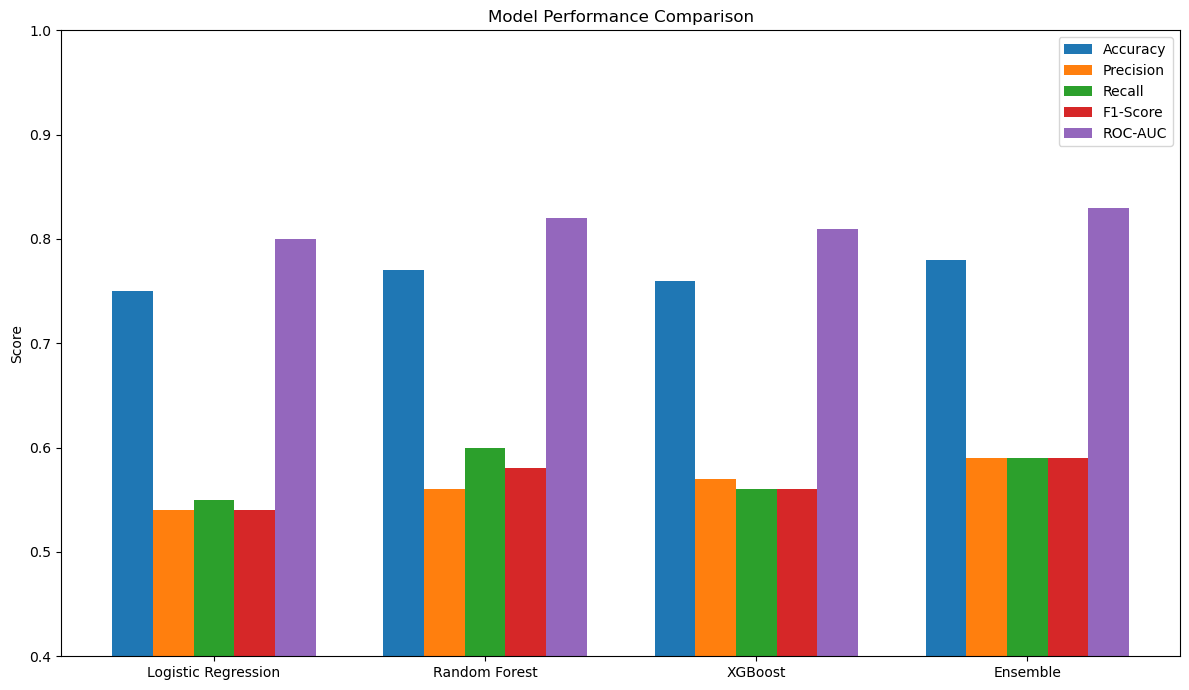

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Example metric data, replace with your actual results:
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Ensemble']
accuracy = [0.75, 0.77, 0.76, 0.78]     # fill with your actual values
precision = [0.54, 0.56, 0.57, 0.59]
recall = [0.55, 0.60, 0.56, 0.59]
f1 = [0.54, 0.58, 0.56, 0.59]
roc_auc = [0.80, 0.82, 0.81, 0.83]

metrics = [accuracy, precision, recall, f1, roc_auc]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(models))

plt.figure(figsize=(12, 7))
width = 0.15
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, metric, width=width, label=metric_names[i])

plt.xticks(x + 2*width, models)
plt.ylim([0.4, 1.0])
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()


##  Interactive ROC Curve with Plotly

In [70]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba_ensemble)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve',
                         line=dict(color='darkorange', width=4)))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines',
                         line=dict(color='navy', width=2, dash='dash'),
                         showlegend=False))

fig.update_layout(title='Interactive ROC Curve - Ensemble Model',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  width=700, height=500)
fig.show()


## Interactive PrecisioN-Recall Curve

In [71]:
import plotly.graph_objects as go
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_proba_ensemble)
avg_precision = average_precision_score(y_test, y_proba_ensemble)

# Create interactive Precision-Recall Curve
fig = go.Figure()
fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name='Precision-Recall Curve',
                         line=dict(color='purple', width=4)))

fig.update_layout(title=f'Interactive Precision-Recall Curve - Ensemble Model (AP={avg_precision:.3f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision',
                  width=700, height=500)
fig.show()


## Interactive Feature Importance Bar Chart for Tuned Random Forest


In [37]:
import plotly.express as px
import pandas as pd

# Extract feature importances
feature_imp_rf = pd.Series(best_rf.feature_importances_, index=X.columns)
top15_rf = feature_imp_rf.sort_values(ascending=False).head(15).reset_index()
top15_rf.columns = ['Feature', 'Importance']

# Interactive bar chart
fig = px.bar(top15_rf, x='Importance', y='Feature', orientation='h',
             color='Importance', color_continuous_scale='viridis',
             title='Top 15 Feature Importances - Tuned Random Forest')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, width=700, height=500)
fig.show()


## Interactive Feature Importance Bar Chart for Tuned XGBoost


In [63]:
import plotly.express as px
import pandas as pd

# Get XGBoost feature importance by weight
importance_dict = best_xgb.get_booster().get_score(importance_type='weight')
# Map feature names
importance_df = pd.DataFrame({
    'Feature': [X.columns[int(k[1:])] if k.startswith('f') else k for k in importance_dict.keys()],
    'Importance': list(importance_dict.values())
})
top15_xgb = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Interactive bar chart
fig = px.bar(top15_xgb, x='Importance', y='Feature', orientation='h',
             color='Importance', color_continuous_scale='viridis',
             title='Top 15 Feature Importances - Tuned XGBoost')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, width=700, height=500)
fig.show()

### DASH DASHBOARD WITH KEY METRICS

In [64]:
import dash
from dash import html, dcc
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from sklearn.metrics import (
    roc_curve, precision_recall_curve, average_precision_score, 
    roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix
)

# ----- Replace these with your actual variable assignments -----
# X.columns, y_test, y_pred_ensemble, y_proba_ensemble, best_rf, best_xgb
# --------------------------------------------------------------

# Key metrics
accuracy = accuracy_score(y_test, y_pred_ensemble)
precision = precision_score(y_test, y_pred_ensemble)
recall = recall_score(y_test, y_pred_ensemble)
rocauc = roc_auc_score(y_test, y_proba_ensemble)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
cm_fig = ff.create_annotated_heatmap(
    z=cm,
    x=['Pred 0', 'Pred 1'],
    y=['True 0', 'True 1'],
    annotation_text=cm.astype(str),
    colorscale='Blues',
    showscale=False
)
cm_fig.update_layout(title='Confusion Matrix')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_ensemble)
roc_fig = go.Figure()
roc_fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve',
                             line=dict(color='darkorange', width=4)))
roc_fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines',
                             line=dict(color='navy', width=2, dash='dash'), showlegend=False))
roc_fig.update_layout(
    title='ROC Curve - Ensemble Model',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate'
)

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba_ensemble)
avg_precision = average_precision_score(y_test, y_proba_ensemble)
pr_fig = go.Figure()
pr_fig.add_trace(go.Scatter(x=recall_vals, y=precision_vals, mode='lines', name='Precision-Recall Curve',
                             line=dict(color='purple', width=4)))
pr_fig.update_layout(
    title=f'Precision-Recall Curve - Ensemble Model (AP={avg_precision:.3f})',
    xaxis_title='Recall',
    yaxis_title='Precision'
)

# Random Forest Feature Importance
feature_imp_rf = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15).reset_index()
feature_imp_rf.columns = ['Feature', 'Importance']
rf_fig = px.bar(
    feature_imp_rf, x='Importance', y='Feature', orientation='h', 
    color='Importance', color_continuous_scale='viridis',
    title='Top 15 Feature Importances - Tuned Random Forest')
rf_fig.update_layout(yaxis={'categoryorder':'total ascending'})

# XGBoost Feature Importance
importance_dict = best_xgb.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': [X.columns[int(k[1:])] if k.startswith('f') else k for k in importance_dict.keys()],
    'Importance': list(importance_dict.values())
})
top15_xgb = importance_df.sort_values(by='Importance', ascending=False).head(15)
xgb_fig = px.bar(
    top15_xgb, x='Importance', y='Feature', orientation='h', 
    color='Importance', color_continuous_scale='viridis',
    title='Top 15 Feature Importances - Tuned XGBoost')
xgb_fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Dash app layout
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Customer Churn Prediction Model Dashboard', style={'textAlign': 'center'}),
    html.Div([
        html.H2('Model Performance Metrics'),
        html.P(f"Ensemble Accuracy: {accuracy:.3f}"),
        html.P(f"Ensemble Precision (Churn): {precision:.3f}"),
        html.P(f"Ensemble Recall (Churn): {recall:.3f}"),
        html.P(f"Ensemble ROC-AUC Score: {rocauc:.3f}"),
        html.Hr(),
        html.H3('Confusion Matrix'),
        dcc.Graph(figure=cm_fig),

        html.H3('ROC Curve'),
        dcc.Graph(figure=roc_fig),

        html.H3('Precision-Recall Curve'),
        dcc.Graph(figure=pr_fig),

        html.H3('Top Feature Importances (Random Forest)'),
        dcc.Graph(figure=rf_fig),

        html.H3('Top Feature Importances (XGBoost)'),
        dcc.Graph(figure=xgb_fig),
    ], style={'width': '80%', 'margin': 'auto'})
])

if __name__ == '__main__':
    app.run(debug=True)


C:\Users\gurio\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated

